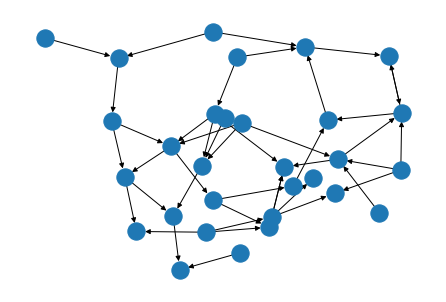

In [13]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import collections

g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [14]:
ranks = nx.pagerank(g)

def initialize():
    global g, current_node, PR_dict, history
    
    #randomly choose a starting node
    current_node = rd.choice(list(g.nodes))
    history = [current_node]
    PR_dict = {node:0 for node in g.nodes}
    
def update(N, alpha = 0.85):
    global g, current_node, PR_dict, history
    
    # iterate n times
    for step in range(N):
        # if the prob is less than alpha
        if np.random.random() < alpha:
            # if the current node has no neighbors, randomly move
            if len(list(g.neighbors(current_node))) == 0:
                current_node = rd.choice(list(g.nodes))
            # otherwise choose a random neighbor
            else:
                current_node = rd.choice(list(g.neighbors(current_node)))
        # 1-a probability move to a random spot
        else:
            current_node = rd.choice(list(g.nodes))
        
        # keep track of current node
        history.append(current_node)
    
    # keep track of count of all nodes
    counts = collections.Counter(history)
    
    # calculate the approx PR by seeing how often a node was visited 
    for node in counts:
        counts[node] *= 1/N
        PR_dict[node] = counts[node]
    
    return PR_dict


In [15]:
initialize()
pagerank100 = update(100)

print('Results:')
print(pagerank100)
print()
print('Confirming they add up to ~1:')
print(sum(pagerank100.values()))

Results:
{0: 0, 1: 0.07, 2: 0.01, 3: 0.02, 4: 0.16, 5: 0.02, 6: 0.02, 7: 0.1, 8: 0.01, 9: 0.02, 10: 0.01, 11: 0, 12: 0, 13: 0.02, 14: 0.03, 15: 0.01, 16: 0.02, 17: 0, 18: 0, 19: 0.08, 20: 0.01, 21: 0.01, 22: 0.15, 23: 0.01, 24: 0.03, 25: 0.04, 26: 0.11, 27: 0, 28: 0, 29: 0.05}

Confirming they add up to ~1:
1.0100000000000002


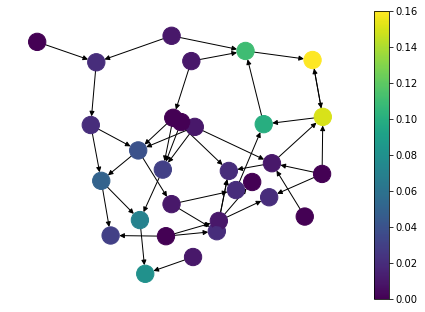

In [16]:
# Visualize results by varying node colors
colors = list(pagerank100[node] for node in pagerank100)

nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=colors)
node_colors = nx.draw_networkx_nodes(g, pos=nx.kamada_kawai_layout(g), 
                                     nodelist=list(g.nodes), 
                                     node_color=colors, node_size=100)
plt.colorbar(node_colors)
plt.axis('off')
plt.show()

In [20]:
alpha = 0.85  # Damping parameter for PageRank
steps = 100000  # Total number of surfer steps
plot_data_interval = 100

In [21]:
# Initialize visits counter for all nodes
for n in g.nodes:
    g.nodes[n]['visits'] = 0

plot_data = []
node = random.choice(list(g.nodes))  # First node
for step in range(steps):
    # Count visit
    g.nodes[node]['visits'] += 1

    # Move to next node
    neighbors = list(g.neighbors(node))
    if (len(neighbors) == 0) or (random.uniform(0, 1) > alpha):
        node = random.choice(list(g.nodes))
    else:
        node = random.choice(neighbors)

    # Record plot data (step, average absolute error)
    if (step + 1) % plot_data_interval == 0:
        approximate_pagerank = {n: g.nodes[n]['visits'] / (step + 1) for n in g.nodes}
        plot_data.append([
            step + 1,
            sum(abs(approximate_pagerank[n] - pagerank[n]) for n in g.nodes) / len(g.nodes)])

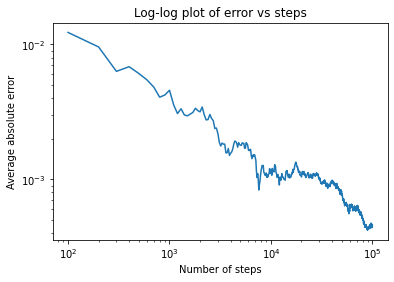

In [22]:
# Plot PageRank error
plt.loglog([d[0] for d in plot_data], [d[1] for d in plot_data])
plt.title('Log-log plot of error vs steps')
plt.xlabel('Number of steps')
plt.ylabel('Average absolute error')
plt.show()